**Price Surge Analysis and Prediction in Instant Product Delivery Services**

**Objective**: Analyze price surges across platforms like Blinkit, Zomato, and Zepto, and identify surge patterns using date, discounts, and platform data.


In [49]:
#Price Surge Analysis and Prediction in Instant Product Delivery Services
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [50]:
df = pd.read_csv('price_surge_data.csv')
df

,Date,Platform,Category,Product_Name,Base_Price,Discount (%),Delivery_Time,Final Price,Weekday,Festival,Platform_Name,Date_formatted,Rolling_Avg,Day Type
0,2024-01-01 00:00:00.000000000,2,0,17,470.827439,9.214369,29,427.443659,0,0,Zepto,01-01-2024,427.443659,Weekday
1,2024-01-01 02:09:43.783783783,2,3,13,461.629002,5.071853,51,438.215856,0,0,Zepto,01-01-2024,432.829758,Weekday
2,2024-01-01 02:09:43.783783783,0,3,19,57.115938,29.743607,12,58.374144,0,1,Blinkit,01-01-2024,58.374144,Weekday
3,2024-01-01 02:09:43.783783783,2,1,6,75.966318,9.354064,19,68.860380,0,0,Zepto,01-01-2024,311.506632,Weekday
4,2024-01-01 08:38:55.135135135,1,3,13,370.956141,17.006784,22,307.868431,0,0,Zomato,01-01-2024,307.868431,Weekday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,2024-03-30 15:21:04.864864865,0,4,13,144.513207,11.696992,20,147.534947,5,0,Blinkit,30-03-2024,249.472135,Weekend
996,2024-03-30 17:30:48.648648649,0,2,3,296.503112,29.555237,21,351.291141,5,1,Blinkit,30-03-2024,293.766458,Weekend
997,2024-03-30 17:30:48.648648649,0,0,18,350.047359,13.628352,49,349.550463,5,0,Blinkit,30-03-2024,282.108453,Weekend
998,2024-03-30 21:50:16.216216217,0,2,10,245.927141,1.827058,49,279.132326,5,0,Blinkit,30-03-2024,293.927165,Weekend


##  Dataset Overview

The dataset includes:
- Date of pricing
- Final Price
- Discount Percentage
- Platform (0 = Blinkit, 1 = Zomato, 2 = Zepto)


In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Date            1000 non-null   object 
 1   Platform        1000 non-null   int64  
 2   Category        1000 non-null   int64  
 3   Product_Name    1000 non-null   int64  
 4   Base_Price      1000 non-null   float64
 5   Discount (%)    1000 non-null   float64
 6   Delivery_Time   1000 non-null   int64  
 7   Final Price     1000 non-null   float64
 8   Weekday         1000 non-null   int64  
 9   Festival        1000 non-null   int64  
 10  Platform_Name   1000 non-null   object 
 11  Date_formatted  1000 non-null   object 
 12  Rolling_Avg     1000 non-null   float64
 13  Day Type        1000 non-null   object 
dtypes: float64(4), int64(6), object(4)
memory usage: 109.5+ KB


In [52]:
df.describe()

,Platform,Category,Product_Name,Base_Price,Discount (%),Delivery_Time,Final Price,Weekday,Festival,Rolling_Avg
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.0000,1000.000000
mean,0.986000,2.044000,9.658000,282.914311,14.383625,34.021000,267.018035,2.902000,0.1020,266.922730
std,0.818825,1.389242,5.740382,127.569495,8.746914,14.199796,128.108830,1.951975,0.3028,48.411670
min,0.000000,0.000000,0.000000,50.199252,0.005596,10.000000,39.766446,0.000000,0.0000,58.374144
25%,0.000000,1.000000,5.000000,178.230999,6.763392,22.000000,167.682726,1.000000,0.0000,233.640879
50%,1.000000,2.000000,10.000000,284.799290,14.051555,33.000000,265.077896,3.000000,0.0000,266.060299
75%,2.000000,3.000000,15.000000,393.326192,22.016661,46.000000,361.142028,5.000000,0.0000,298.040968
max,2.000000,4.000000,19.000000,499.794763,29.928685,59.000000,768.144222,6.000000,1.0000,432.829758


In [53]:
df.head()

,Date,Platform,Category,Product_Name,Base_Price,Discount (%),Delivery_Time,Final Price,Weekday,Festival,Platform_Name,Date_formatted,Rolling_Avg,Day Type
0,2024-01-01 00:00:00.000000000,2,0,17,470.827439,9.214369,29,427.443659,0,0,Zepto,01-01-2024,427.443659,Weekday
1,2024-01-01 02:09:43.783783783,2,3,13,461.629002,5.071853,51,438.215856,0,0,Zepto,01-01-2024,432.829758,Weekday
2,2024-01-01 02:09:43.783783783,0,3,19,57.115938,29.743607,12,58.374144,0,1,Blinkit,01-01-2024,58.374144,Weekday
3,2024-01-01 02:09:43.783783783,2,1,6,75.966318,9.354064,19,68.860380,0,0,Zepto,01-01-2024,311.506632,Weekday
4,2024-01-01 08:38:55.135135135,1,3,13,370.956141,17.006784,22,307.868431,0,0,Zomato,01-01-2024,307.868431,Weekday


In [54]:
#missing value
print("Missing values:\n",df.isnull().sum())

Missing values:
 Date              0
Platform          0
Category          0
Product_Name      0
Base_Price        0
Discount (%)      0
Delivery_Time     0
Final Price       0
Weekday           0
Festival          0
Platform_Name     0
Date_formatted    0
Rolling_Avg       0
Day Type          0
dtype: int64


In [65]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split

# Encode categorical variables
label_enc = LabelEncoder()
df["Product_Name"] = label_enc.fit_transform(df["Product_Name"])
df["Platform"] = label_enc.fit_transform(df["Platform"])
df["Category"] = label_enc.fit_transform(df["Category"])
df["Day Type"] = label_enc.fit_transform(df["Day Type"])  # This was missing

# Optional: remap for display (not needed for modeling)
df["Platform_Name"] = df["Platform"].map({0: "Blinkit", 1: "Zomato", 2: "Zepto"})

# Drop non-numeric or unnecessary columns for modeling
X = df.drop(columns=["Final Price", "Platform_Name", "Date", "Date_formatted"])
y = df["Final Price"]

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale numeric features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [66]:
X_train

,Platform,Category,Product_Name,Base_Price,Discount (%),Delivery_Time,Weekday,Festival,Rolling_Avg,Day Type
29,2,1,2,270.844253,9.711925,42,2,0,299.933678,0
535,0,0,3,432.130552,9.934395,18,0,0,208.900295,0
695,0,2,6,201.053225,27.723231,32,6,0,235.929910,1
557,0,0,13,485.173707,23.461523,43,1,0,286.428045,0
836,0,1,7,81.410295,20.272839,12,5,0,195.546312,1
...,...,...,...,...,...,...,...,...,...,...
106,2,1,8,292.465854,28.206624,32,2,0,240.747916,0
270,2,4,7,141.811100,16.400890,32,2,0,211.701311,0
860,1,4,9,201.803063,13.201741,24,0,0,293.875572,0
435,1,0,11,156.688119,2.527661,42,5,0,198.633733,1


In [67]:
X_test

,Platform,Category,Product_Name,Base_Price,Discount (%),Delivery_Time,Weekday,Festival,Rolling_Avg,Day Type
521,2,3,19,267.954992,6.447496,30,5,1,308.334705,1
737,1,4,9,104.672926,2.239153,30,4,0,304.372625,0
740,0,2,15,205.071838,27.807490,31,4,0,295.521691,0
660,0,0,10,181.173083,25.117890,16,4,0,272.343310,0
411,1,2,9,284.878852,2.925231,32,2,0,228.621461,0
...,...,...,...,...,...,...,...,...,...,...
408,0,0,1,438.782711,15.694291,23,2,0,296.111109,0
332,2,1,3,422.036046,8.570988,35,2,0,253.415595,0
208,0,2,1,465.065368,9.783236,28,4,0,315.718297,0
613,2,1,4,141.998258,19.960956,35,1,0,324.549508,0


In [68]:
y_train

29     244.540063
535    389.200998
695    168.004780
557    371.344565
836     75.040807
          ...    
106    209.971110
270    118.552817
860    175.161545
435    176.575043
102    190.858381
Name: Final Price, Length: 800, dtype: float64

In [69]:
y_test

521    421.605721
737    118.307204
740    171.163056
660    156.849673
411    276.545488
          ...    
408    369.918877
332    385.863388
208    485.079718
613    113.654048
78     429.561966
Name: Final Price, Length: 200, dtype: float64

In [70]:
from sklearn.ensemble import RandomForestRegressor
# Train a RandomForest Regressor model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [71]:
# Predict on test data
y_pred = model.predict(X_test)

In [72]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [73]:
print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"R^2 Score: {r2}")


MAE: 11.271939321854447
MSE: 513.3306432545716
R^2 Score: 0.9724025865317276


In [74]:
df["Date"] = pd.to_datetime(df["Date"])
df["Date_formatted"] = df["Date"].dt.strftime("%d-%m-%Y")


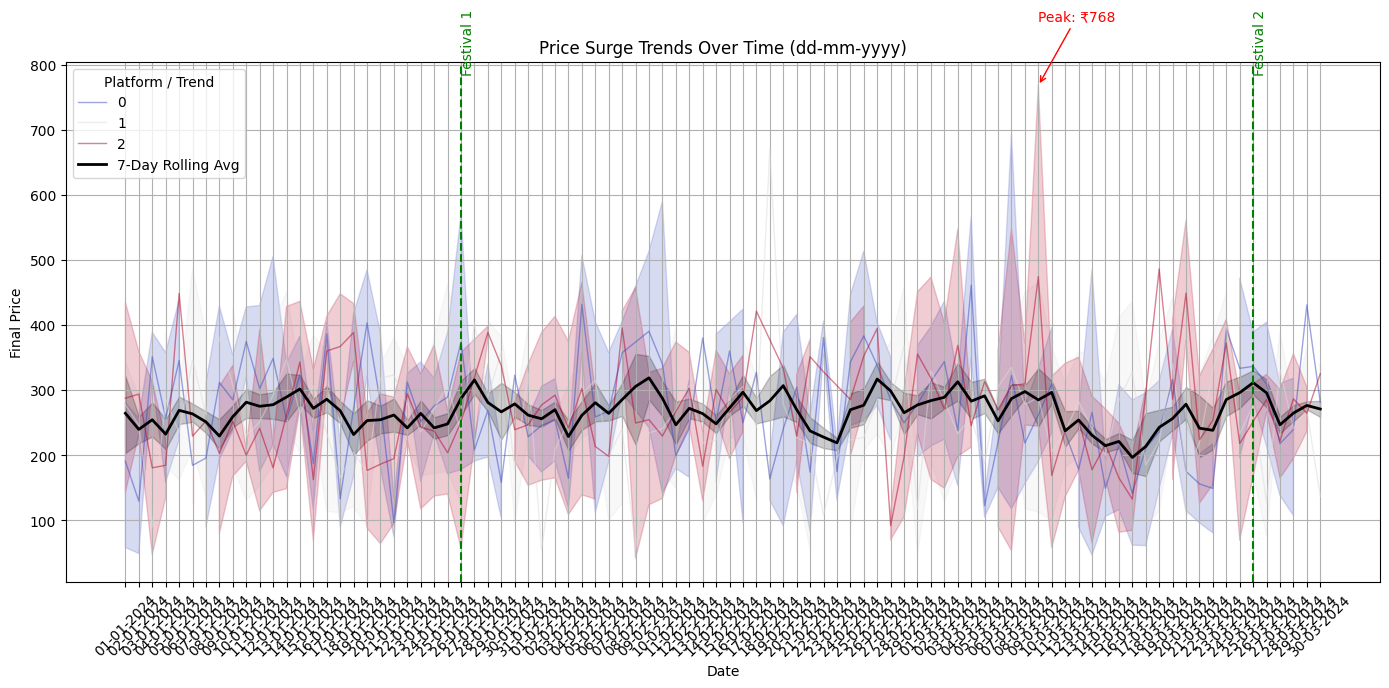

In [82]:
plt.figure(figsize=(14, 7))

sns.lineplot(x="Date_formatted", y="Final Price", hue=df["Platform"], data=df, palette="coolwarm", linewidth=1, alpha=0.5)

# Rolling Average
df["Rolling_Avg"] = df.groupby("Platform")["Final Price"].transform(lambda x: x.rolling(7, 1).mean())
sns.lineplot(x="Date_formatted", y="Rolling_Avg", data=df, color="black", label="7-Day Rolling Avg", linewidth=2)

# Peak Annotation
peak = df.loc[df["Final Price"].idxmax()]
plt.annotate(f"Peak: ₹{peak['Final Price']:.0f}",
             xy=(peak["Date_formatted"], peak["Final Price"]),
             xytext=(peak["Date_formatted"], peak["Final Price"] + 100),
             arrowprops=dict(arrowstyle="->", color="red"), color="red")

# Highlight Festivals
festivals = ["26-01-2024", "25-03-2024"]
for i, date in enumerate(festivals):
    plt.axvline(date, color="green", linestyle="--")
    plt.text(date, df["Final Price"].max()+20, f"Festival {i+1}", rotation=90, color="green")

plt.title("Price Surge Trends Over Time (dd-mm-yyyy)")
plt.xlabel("Date")
plt.ylabel("Final Price")
plt.legend(title="Platform / Trend")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


   Platform  Average Final Price
0         0           268.045240
1         1           265.114814
2         2           267.861811


C:\Users\Megha Sam\AppData\Local\Temp\ipykernel_29488\3898528102.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=avg_price_per_platform, x="Platform", y="Average Final Price", palette="Set2")


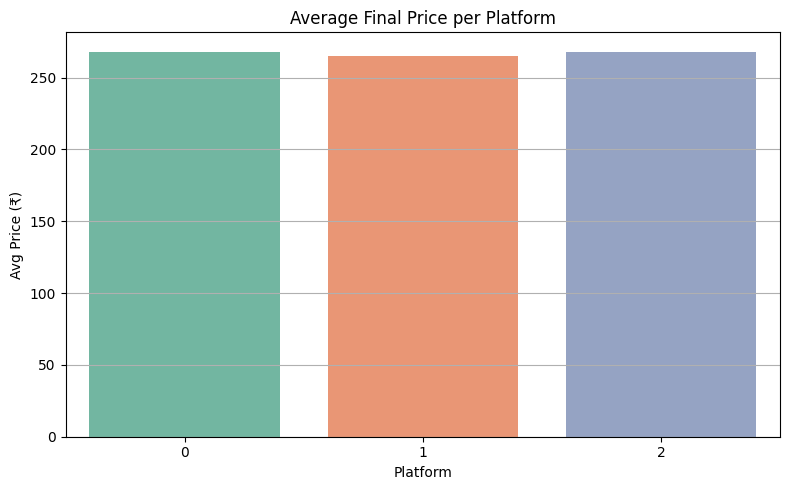

In [84]:
# Group by platform and calculate mean price
avg_price_per_platform = df.groupby("Platform")["Final Price"].mean().reset_index()

# Rename for clarity
avg_price_per_platform.columns = ["Platform", "Average Final Price"]

# Display result
print(avg_price_per_platform)

# Optional: Bar Plot
import seaborn as sns

plt.figure(figsize=(8, 5))
sns.barplot(data=avg_price_per_platform, x="Platform", y="Average Final Price", palette="Set2")
plt.title("Average Final Price per Platform")
plt.xlabel("Platform")
plt.ylabel("Avg Price (₹)")
plt.grid(axis="y")
plt.tight_layout()
plt.show()

  Day Type  Final Price
0  Weekday   263.423645
1  Weekend   277.248221


C:\Users\Megha Sam\AppData\Local\Temp\ipykernel_29488\2843179955.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=avg_price_by_daytype, x="Day Type", y="Final Price", palette="coolwarm")


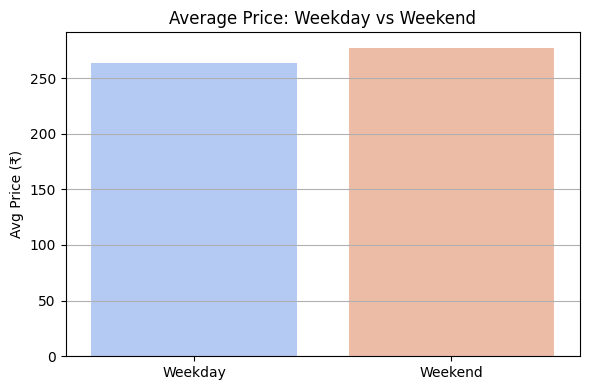

In [85]:
# Ensure 'Date' is datetime
df["Date"] = pd.to_datetime(df["Date"])

# Add a column for weekday/weekend
df["Day Type"] = df["Date"].dt.dayofweek.apply(lambda x: "Weekend" if x >= 5 else "Weekday")

# Group by Day Type
avg_price_by_daytype = df.groupby("Day Type")["Final Price"].mean().reset_index()

# Display result
print(avg_price_by_daytype)

# Optional: Bar Plot
plt.figure(figsize=(6, 4))
sns.barplot(data=avg_price_by_daytype, x="Day Type", y="Final Price", palette="coolwarm")
plt.title("Average Price: Weekday vs Weekend")
plt.ylabel("Avg Price (₹)")
plt.xlabel("")
plt.grid(axis="y")
plt.tight_layout()
plt.show()

In [26]:
pip install statsmodels

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


C:\Users\Megha Sam\AppData\Local\Temp\ipykernel_29488\2076232179.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="Platform", y="Discount (%)", palette="pastel")


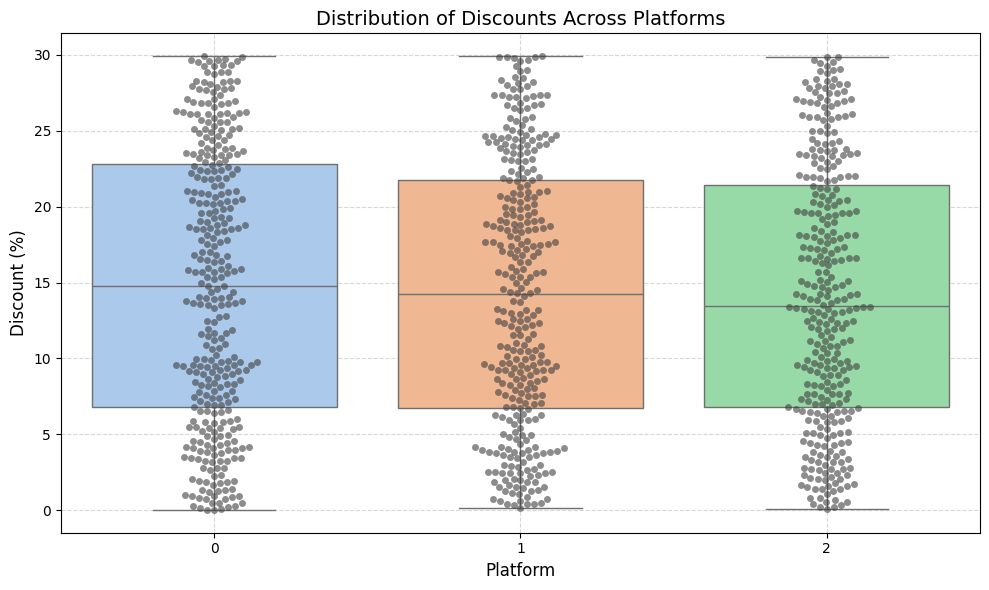

In [86]:

plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x="Platform", y="Discount (%)", palette="pastel")
sns.swarmplot(data=df, x="Platform", y="Discount (%)", color=".25", alpha=0.6)
plt.title("Distribution of Discounts Across Platforms", fontsize=14)
plt.xlabel("Platform", fontsize=12)
plt.ylabel("Discount (%)", fontsize=12)
plt.grid(True, linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()


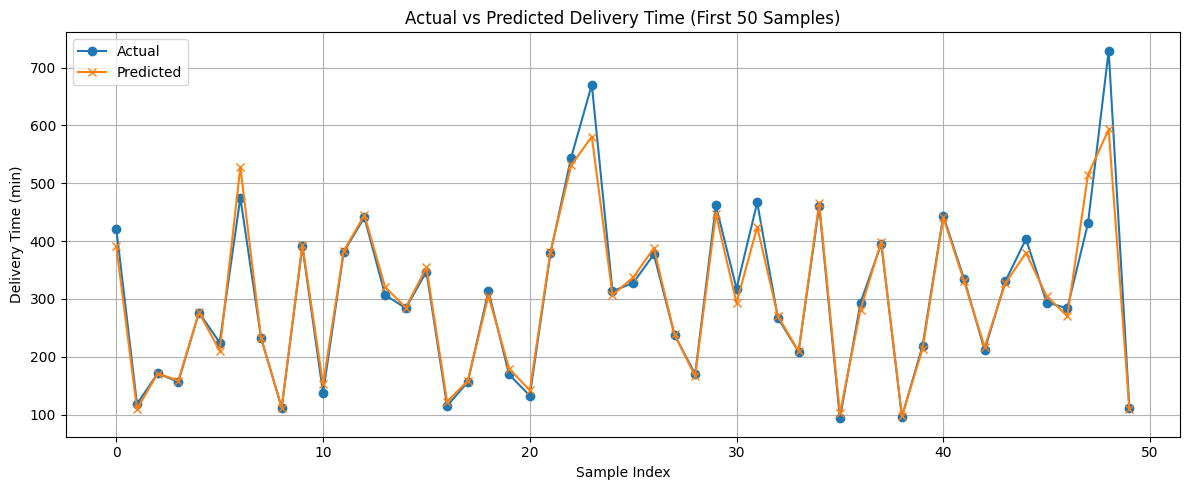

In [87]:
plt.figure(figsize=(12, 5))
plt.plot(y_test.values[:50], label="Actual", marker='o')
plt.plot(y_pred[:50], label="Predicted", marker='x')
plt.title("Actual vs Predicted Delivery Time (First 50 Samples)")
plt.xlabel("Sample Index")
plt.ylabel("Delivery Time (min)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


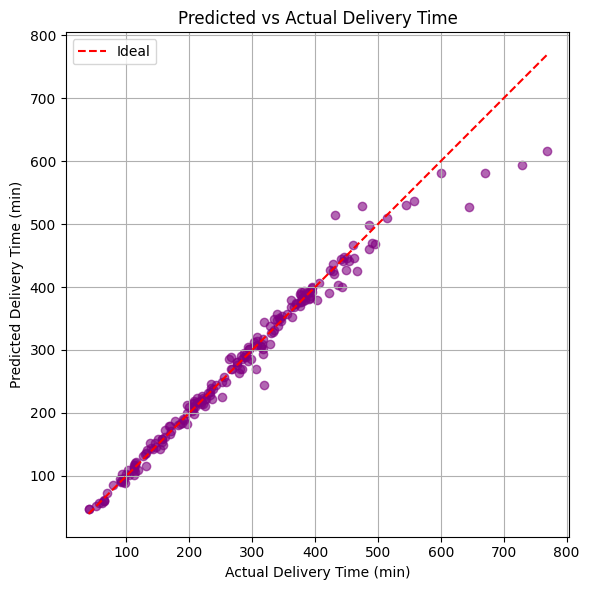

In [88]:
plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_pred, alpha=0.6, color='purple')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label="Ideal")
plt.xlabel("Actual Delivery Time (min)")
plt.ylabel("Predicted Delivery Time (min)")
plt.title("Predicted vs Actual Delivery Time")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


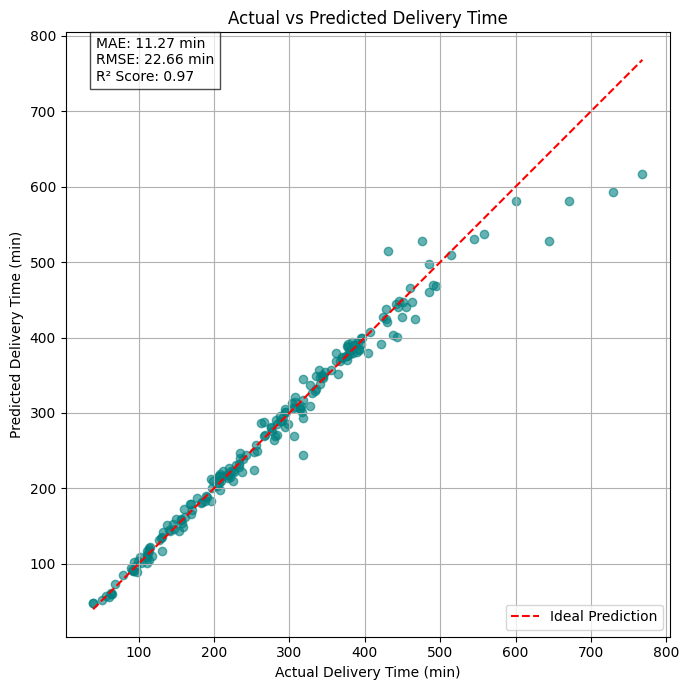

 Evaluation Metrics:
Mean Absolute Error (MAE): 11.27 min
Root Mean Squared Error (RMSE): 22.66 min
R² Score: 0.97


In [89]:
#Calculate metrics
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

#Scatter plot
plt.figure(figsize=(7, 7))
plt.scatter(y_test, y_pred, alpha=0.6, color='teal')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label="Ideal Prediction")
plt.xlabel("Actual Delivery Time (min)")
plt.ylabel("Predicted Delivery Time (min)")
plt.title("Actual vs Predicted Delivery Time")

#Annotate metrics on the plot
plt.text(
    0.05, 0.92,
    f"MAE: {mae:.2f} min\nRMSE: {rmse:.2f} min\nR² Score: {r2:.2f}",
    transform=plt.gca().transAxes,
    bbox=dict(facecolor='white', alpha=0.7),
    fontsize=10
)

plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# Print below for clarity
print(" Evaluation Metrics:")
print(f"Mean Absolute Error (MAE): {mae:.2f} min")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f} min")
print(f"R² Score: {r2:.2f}")


##  Final Conclusion

This project successfully visualized price trends and highlighted surge patterns in delivery platforms. Key insights include:
- Surge patterns are visible during weekends and festival dates.
- Zepto shows relatively higher price variations.
- Discounts influence final price surges.

These insights can support better pricing strategies and user transparency in real-time delivery platforms.
